In [1]:
# run this to shorten the data import from the files
import os
cwd = os.path.dirname(os.getcwd())+'/'
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


In [14]:
# exercise 01

"""
List the poorest and richest countries worldwide

The values of numerical variables are numbers. They can be described by measures of central tendency, or the most typical value in a dataset, and dispersion, which represents the spread of a distribution.

In the next few exercises, you will use these statistics to explore the data in 'per_capita_income.csv', which contains the average income earned per person in a given country. The first step in analyzing aspects of the global income distribution is to inspect and familiarize yourself with the data.

pandas has been imported as pd.
"""

# Instructions

"""

    
    Load the 'per_capita_income.csv' file into income. No additional arguments other than the file name are needed. (Note that this is a csv file.)
    
    Inspect the column names and data types with .info().
    
    Using .sort_values(), sort (in descending order) the income DataFrame by the column which contains the income information.
    
    Display the first five rows of income using .head() and the last five rows using .tail().

"""

# solution
import pandas as pd
# Import the data
income = pd.read_csv(path_data+'per_capita_income.csv')

# Inspect the result
income.info()

# Sort the data by income
income = income.sort_values('Income per Capita', ascending=False)

# Display the first and last five rows
print(income.head())
print(income.tail())

#----------------------------------#

# Conclusion

"""
As you can see, the countries with the highest per capita income are Qatar, Macao SAR, Luxembourg, Singapore, and Brunei.
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            184 non-null    object 
 1   Income per Capita  184 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB
               Country  Income per Capita
133              Qatar       141542.66280
97    Macao SAR, China       111496.62940
96          Luxembourg       102051.68030
144          Singapore        85382.30227
23   Brunei Darussalam        78369.29102
                      Country  Income per Capita
121                     Niger         955.483324
94                    Liberia         835.366935
37           Congo, Dem. Rep.         784.365232
26                    Burundi         727.150789
31   Central African Republic         618.752859


'\nAs you can see, the countries with the highest per capita income are Qatar, Macao SAR, Luxembourg, Singapore, and Brunei.\n'

In [16]:
# exercise 02

"""
Global incomes: Central tendency

The most common measures of central tendency are the mean, which is equal to the sum of all values divided by the total number of values, median, which separates the upper half of data from the lower half, and mode, which is the most frequent value in the data set. The pandas package contains functions that can calculate each of these.

In this data set, the values for 'Income per Capita' are floats, and there are no repeat values, so running income['Income per Capita'].mode() in your console returns an empty series. Here, you will use the floor division operator // to add a new column that measures income in thousands, rounded down, so that a value such as 11,543.43 becomes just 11. Then, you will run the above functions to better understand how incomes are distributed.

pandas has been imported as pd, and the income DataFrame from the previous exercise is in your workspace.
"""

# Instructions

"""

    
    Use the appropriate function to calculate the global mean of 'Income per Capita'.
    
    Use the appropriate function to calculate the global median of 'Income per Capita'.
    
    Using broadcasting, create a new column 'Income per Capita (,000)' equal to income['Income per Capita'] // 1000. Then use the appropriate function to calculate the mode for this new column.

"""

# solution

# Calculate the mean
print(income['Income per Capita'].mean())

# Calculate the median
print(income['Income per Capita'].median())

# Create the new column
income['Income per Capita (,000)'] = income['Income per Capita'] // 1000

# Calculate the mode of the new column
print(income['Income per Capita (,000)'].mode())

#----------------------------------#

# Conclusion

"""
Nice work. Rounded down to the nearest thousand, the most common value in Income per Capita is 1.0.
"""

19469.41956573696
11620.93252
0    1.0
Name: Income per Capita (,000), dtype: float64


'\nNice work. Rounded down to the nearest thousand, the most common value in Income per Capita is 1.0.\n'

In [17]:
# exercise 03

"""
Exercise
Exercise
Global incomes: Dispersion

A quantile is a measure of dispersion created by dividing a frequency distribution of a DataFrame into even groups. You can return values at the given quantile q of a DataFrame df with the command df.quantile(q); likewise, supplying a list as q will return a value for each given quantile.

Here, you will continue your analysis of global income distribution using two measures of dispersion: the standard deviation, or square root of variance, and the interquartile range (IQR).

pandas has been imported as pd, and the income DataFrame from the previous exercise is in your workspace.
"""

# Instructions

"""

    
    Using the appropriate functions, calculate the mean of income per capita as mean and the standard deviation as std.
    
    Without using .quantile(), calculate and print the upper and lower bounds of an interval of one standard deviation around the mean in a list bounds:
    
        subtract std from mean as the first element
    
        add std to mean as the second element
    
    Using .quantile() and a list of two appropriate decimal values, calculate and print the first and the third quartile of 'Income per Capita' as quantiles. Do the values match?
    
    Calculate and print the IQR, iqr, using the simple subtraction expression you learned in the video.

"""

# solution

# Calculate mean
mean = income['Income per Capita'].mean()

# Calculate standard deviation
std = income['Income per Capita'].std()

# Calculate and print lower and upper bounds
bounds = [mean - std, mean + std]
print(bounds)

# Calculate and print first and third quartiles
quantiles = income['Income per Capita'].quantile([0.25, 0.75])
print(quantiles)

# Calculate and print IQR
iqr = quantiles[0.75] - quantiles[0.25]
print(iqr)

#----------------------------------#

# Conclusion

"""
Nice work.
"""

[-2497.4416414691186, 41436.280772943035]
0.25     3922.35894
0.75    26558.75467
Name: Income per Capita, dtype: float64
22636.395729999997


'\nNice work.\n'

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
0.1     1805.906426
0.2     3177.255688
0.3     5506.323195
0.4     8510.729683
0.5    11620.932520
0.6    15790.369076
0.7    22563.075646
0.8    32517.693902
0.9    47377.886804
Name: Income per Capita, dtype: float64


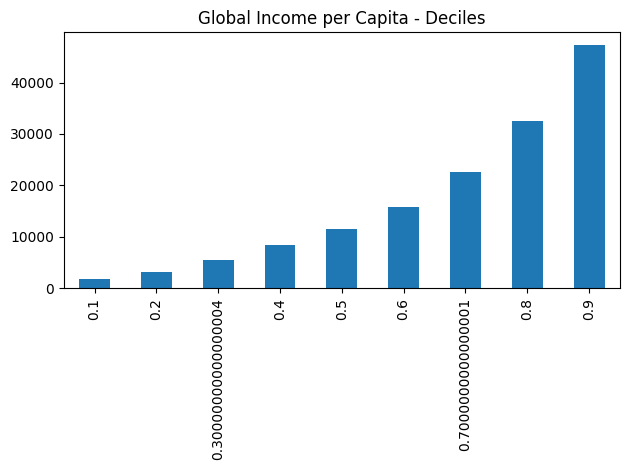

'\nAs expected, the height difference between any two adjacent bars is the same!\n'

In [20]:
# exercise 04

"""
Deciles of the global income distribution

A decile is a special kind of quantile obtained by dividing the distribution of a particular dataset by ten. Deciles (as well as any other kind of quantile) can be created by supplying the following numpy function to .quantile(), where start is the beginning of the interval (inclusive), stop is the end of the interval (exclusive), and step is the spacing between any two adjacent values:

np.arange(start, stop, step)

As you saw in the video, a standard bar graph is a great way to visualize the distribution of data. You can create one by adding kind='bar' as an argument to .plot().

Now it's your turn to apply this knowledge to plot a summary of the income distribution in deciles! pandas as pd, numpy as np, and matplotlib.pyplot as plt have been imported for you, and the income DataFrame from the previous exercise is available in your workspace.
"""

# Instructions

"""

    
    Generate the percentages from 10% to 90% with increments of 10% using np.arange(), assign the result to quantiles, and print it.
    
    Using quantiles and .quantile(), calculate the deciles for the income per capita as deciles, and print the result.
    
    Plot and show the result as a bar chart with plt.tight_layout(). Title it 'Global Income per Capita - Deciles'.

"""
import numpy as np
import matplotlib.pyplot as plt
# solution

# Generate range of deciles
quantiles = np.arange(0.1, 0.91, 0.1)

# Print them
print(quantiles)

# Calculate deciles for 'Income per Capita'
deciles = income['Income per Capita'].quantile(quantiles)

# Print them
print(deciles)

# Plot deciles as a bar chart
deciles.plot(kind='bar', title='Global Income per Capita - Deciles')

# Make sure to use the tight layout!
plt.tight_layout()

# Show the plot
plt.show()

#----------------------------------#

# Conclusion

"""
As expected, the height difference between any two adjacent bars is the same!
"""

In [26]:
# exercise 05

"""
Getting all the statistics

You can retrieve all major central tendency, dispersion, and shape statistics of a distribution at once with the pandas .describe() method. The default value of its optional percentiles argument corresponds with quartiles, but you can supply your own list of percentiles, as instead:

DataFrame.describe(percentiles=[.25, .5, .75])

The outputs of .describe() also include the total number of entries in the given series (which can be calculated with .count()), minimum value in the series (which can be calculated with .min()), and maximum value in the series (which can be calculated with .max()).

pandas as pd and numpy as np have been imported for you, and the income DataFrame from the previous exercise is available in your workspace.

This exercise will test your knowledge of the metrics and functions covered so far. Which of the following statements regarding the data in the 'Income per Capita' column in income is FALSE?
"""

# Instructions

"""
Possible answers:

    The maximum income per capita belongs to Qatar.

    The difference between the median of the data and India's per capita income, rounded to the nearest tenth, is 5516.4.

    The eighth decile rounded to the nearest tenth is 21054.2. {Answer}

    The DataFrame holds income data for 184 countries.
"""

# solution

print(income['Income per Capita'].quantile(0.8))

#----------------------------------#

# Conclusion

"""
Correct! The true value of the eight decile is 10,000+ more.
"""

32517.693902000006


'\nCorrect! The true value of the eight decile is 10,000+ more.\n'

       Income per Capita  Income per Capita (,000)
count         184.000000                184.000000
mean        19469.419566                 18.967391
std         21966.861207                 21.975869
min           618.752859                  0.000000
25%          3922.358940                  3.000000
50%         11620.932520                 11.000000
75%         26558.754670                 26.000000
max        141542.662800                141.000000


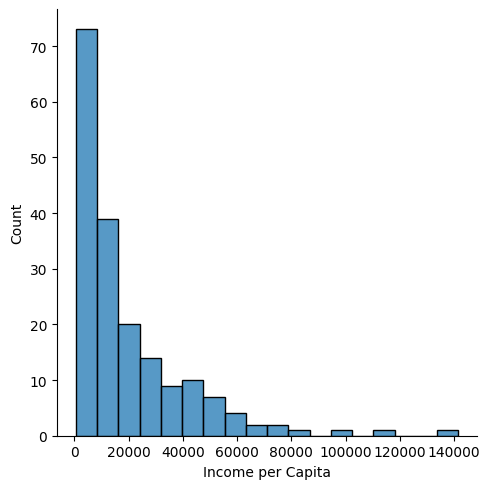

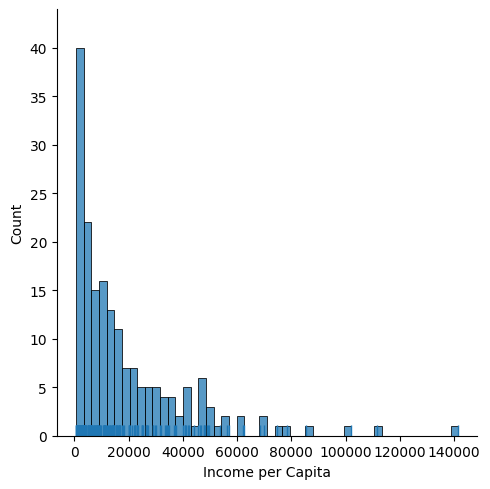

'\nNice work! The seaborn package also includes a .rugplot() function if you want to avoid using distplot().\n'

In [27]:
# exercise 06

"""
Visualizing international income distribution

seaborn is a Python visualization library for statistical data visualization based on matplotlib.

By default, the distplot() function in the seaborn package creates a histogram, where data is grouped into ranges and and plotted as bars, and fits a kernel density estimation (KDE), or smoothed histogram. You can also use distplot() to create another kind of graph called a rugplot, which adds markers at the bottom of the chart to indicate the density of observations along the x axis.

seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, ...)

In previous exercises, you created a quantile plot which provided a fairly granular sense of the level of income per capita at different points of the distribution. Here, you will use distplot() to get the full picture!

pandas has been imported as pd, and the income DataFrame from the previous exercise is available in your workspace.
"""

# Instructions

"""

    
    Import seaborn as sns and matplotlib.pyplot as plt.
    
    Print the summary statistics provided by .describe().
    
    Plot and show a basic histogram of the 'Income per Capita' column with .distplot().
    
    Create and show a rugplot of the same data by setting the additional arguments bins equal to 50, kde to False, and rug to True.

"""

# solution

# Import seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Print the summary statistics for income
print(income.describe())

# Plot a basic histogram of income per capita
sns.displot(income['Income per Capita'])

# Show the plot
plt.show()

# Plot a rugplot
sns.displot(income['Income per Capita'], bins=50, kde=False, rug=True)

# Show the plot
plt.show()

#----------------------------------#

# Conclusion

"""
Nice work! The seaborn package also includes a .rugplot() function if you want to avoid using distplot().
"""

           China     Brazil        USA
count  40.000000  40.000000  40.000000
mean    0.083084   0.013315   0.018239
std     0.032205   0.033211   0.019386
min    -0.030813  -0.066154  -0.036241
25%     0.067948  -0.005524   0.009093
50%     0.085920   0.016912   0.019851
75%     0.099599   0.032199   0.030144
max     0.136383   0.071762   0.063344


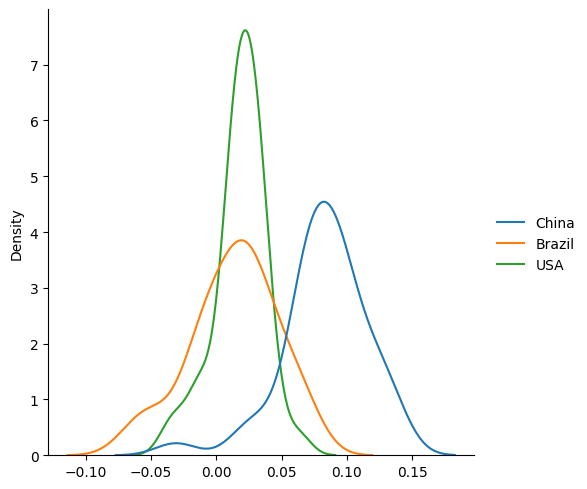

"\nNice work. Notice how you didn't have to set the kde and rug arguments in distplot() because their default values are True and False, respectively.\n"

In [43]:
# exercise 07

"""
Growth rates in Brazil, China, and the US

It's time to extend your analysis beyond the levels of international per capita income to the growth rates. The 'income_growth.csv' file contains the growth rates of per capita income over the last 40 years for Brazil, China, and the US.

You will plot the distribution of the historical growth rates for each country on the same chart using a KDE plot to faciliate visual comparison of the ranges of growth that these markets have experienced over this time period.

From this point in the course onwards, you should always inspect any DataFrame with .info() in your console even if this isn't explicitly in the instructions. pandas as pd, seaborn as sns, and matplotlib.pyplot as plt have been imported.
"""

# Instructions

"""

    
    Load the file 'income_growth.csv' into the variable growth. Parse the 'DATE' column into dtype datetime64 and set it as the index.
    
    Inspect the summary statistics for these three growth rates using the appropriate function.
    
    Iterate over the growth.columns attribute in a for loop to access their labels. Most of the code has been outlined for you.
        In each iteration of distplot(), pass in the iteration variable column to select the respective column, set the keyword hist to False, and set label to column.
        Show the result.

"""

# solution

# Load the file into growth
growth = pd.read_csv(path_data+'income_growth.csv', parse_dates=['DATE'], index_col='DATE')
# Inspect the summary statistics for the growth rates
print(growth.describe())

# Iterate over the three columns
sns.displot(data=growth, kind='kde')
    
# Show the plot
plt.show()

#----------------------------------#

# Conclusion

"""
Nice work. Notice how you didn't have to set the kde and rug arguments in distplot() because their default values are True and False, respectively.
"""

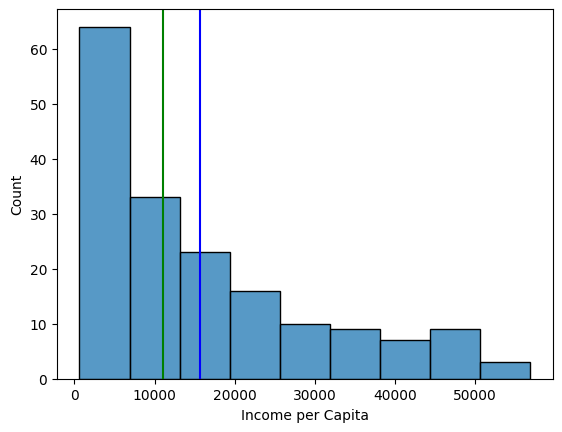

'\nAwesome job! Notice how the median is smaller than the mean because the distribution is skewed right.\n'

In [47]:
# exercise 08

"""
Highlighting values in the distribution

Sometimes it is necessary to manipulate your data in order to create a better visualization. Two methods that can take care of missing values are .dropna() and .fillna(). You can also remove outliers by filtering entries that are over or under a certain percentile by applying a condition using .quantile() to a particular column.

You also saw in the video how to emphasize a particular value in a plot by adding a vertical line at position x across the axes:

Axes.axvline(x=0, color=None, ...)

In this exercise, you will take a final look at global income distribution, and then remove outliers above the 95th percentile, plot the distribution, and highlight both the mean and median values. pandas as pd, seaborn as sns, and matplotlib.pyplot as plt have been imported, and the income DataFrame from previous exercises is available in your workspace.
"""

# Instructions

"""

    
    Assign the column 'Income per Capita' to inc_per_capita.
    
    Filter to keep only the rows in inc_per_capita that are lower than the 95th percentile. Reassign to the same variable.
    
    Plot a default histogram for the filtered version of inc_per_capita and assign it to ax.
    
    Use ax.axvline() with color='b' to highlight the mean of inc_per_capita in blue,
    
    Use ax.axvline() with color='g' to highlight the median in green. Show the result!

"""

# solution

# Create inc_per_capita
inc_per_capita = income['Income per Capita']

# Filter out incomes above the 95th percentile
inc_per_capita = inc_per_capita[inc_per_capita < inc_per_capita.quantile(0.95)]

# Plot histogram and assign to ax
ax = sns.histplot(inc_per_capita)

# Highlight mean
ax.axvline(inc_per_capita.mean(), color='b')

# Highlight median
ax.axvline(inc_per_capita.median(), color='g')

# Show the plot
plt.show()

#----------------------------------#

# Conclusion

"""
Awesome job! Notice how the median is smaller than the mean because the distribution is skewed right.
"""

In [50]:
listings = pd.read_excel(path_data+'listings.xlsx', sheet_name=None)

/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


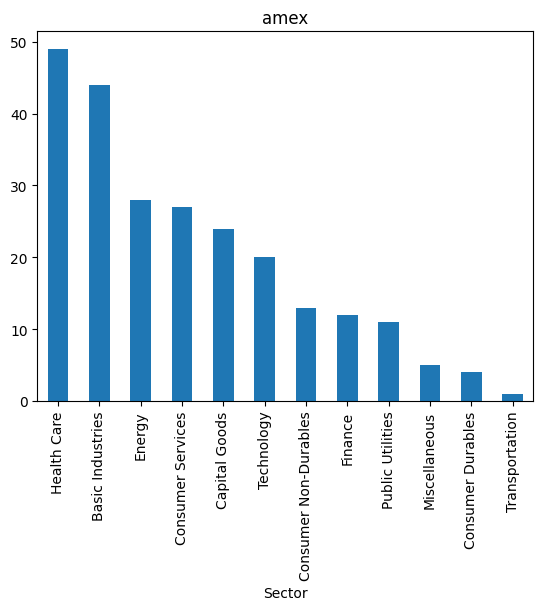

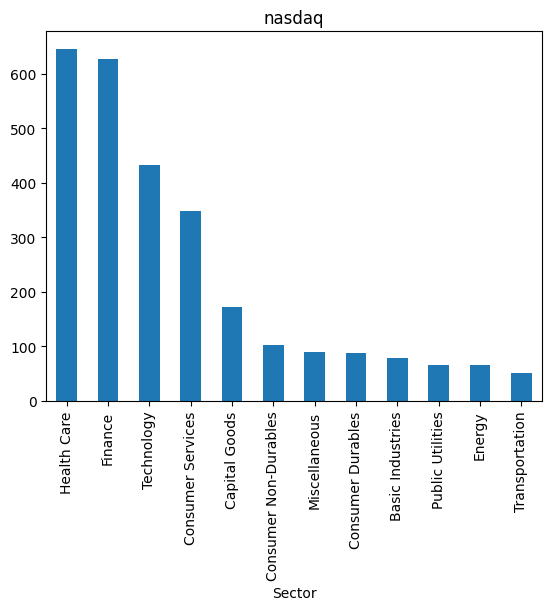

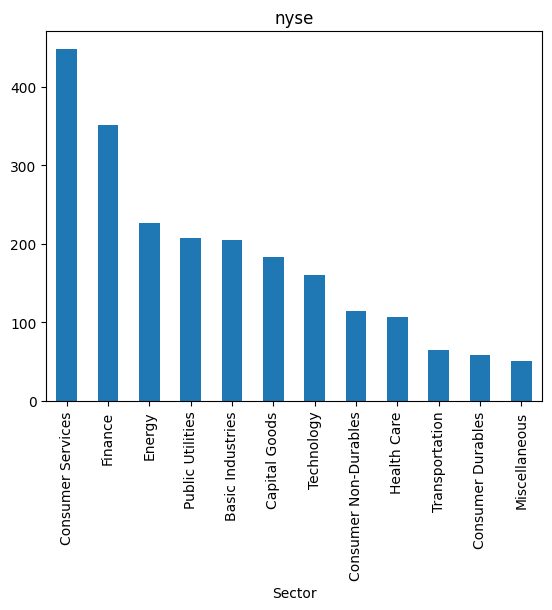

'\nGreat work!\n'

In [53]:
# exercise 09

"""
Companies by sector on all exchanges

A categorical variable is a variable that is one of a limited number of values based on some qualitative property. A frequency distribution is a representation of the number of times that a categorical variable occurs.

Think back to the stock exchange data from the earlier chapters. The .mean() function isn't very helpful for understanding the frequency of 'Sector' values such as 'Technology' and 'Finance', whereas .value_counts() and .nunique() are.

In this exercise, you will compare the distribution of listings in the AMEX, NASDAQ, and NYSE per sector. pandas as pd and matplotlib.pyplot as plt have been imported, and the listings information from previous exercises has been loaded into a dictionary listings for which the keys are 'amex', 'nasdaq', and 'nyse'.
"""

# Instructions

"""

    
    Create a list exchanges containing the exact strings of the names of the exchanges in the order listed above.
    
    Use a for loop to iterate over exchanges with an iterator variable exchange that contains the name of each exchange. In each iteration:
        Apply .value_counts() to 'Sector' and assign the result to sectors.
        Sort sectors in descending order and plot them in a bar plot.
        Show the result.

"""

# solution

# Create the list exchanges
exchanges = ['amex', 'nasdaq', 'nyse']

# Iterate over exchanges then plot and show result
for exchange in exchanges:
    sectors = listings[exchange].Sector.value_counts()
    # Sort in descending order and plot
    sectors.sort_values(ascending=False).plot(kind='bar', title=exchange)
    # Show the plot
    plt.show()

#----------------------------------#

# Conclusion

"""
Great work!
"""

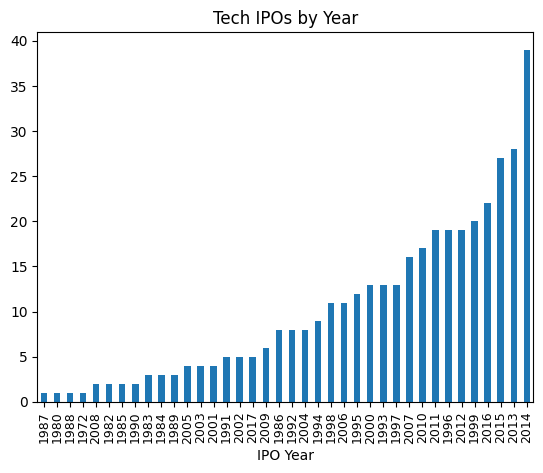

'\nWell done! It seems like 2014 was the most common year for a technology company to go public.\n'

In [58]:
# exercise 10

"""
Technology IPOs by year on all exchanges

Each company in the listings dictionary has an IPO year between 1972 and 2017. Therefore, in this context, it is appropriate to consider the 'IPO Year' column of each sheet as a categorical variable with a well-defined order even though it is of dtype float64.

Here you will combine data from all three exchanges and plot the distribution of IPO years for companies in the Technology sector. pandas as pd and matplotlib.pyplot as plt have been imported, and the listings dictionary from the previous exercise is in your workspace.
"""

# Instructions

"""

    
    Use a for loop with iterator variable exchange that contains the name of each exchange.
        In each iteration, append the DataFrame corresponding to the key exchange in listings to all_listings.
    
    After the loop completes, use pd.concat() to combine the three DataFrames in all_listings and assign the result to listing_data.
    
    Filter listing_data for 'Technology' companies and assign the result to tech_companies.
    
    Assign the 'IPO Year' column from tech_companies to ipo years.
    
    For this data, use .dropna() to remove missing values and .astype() to convert to int.
    
    Apply .value_counts() to ipo_years, sort the years in ascending order, and create a bar plot titled 'Tech IPOs by Year'.
    Rotate xticks by 45 degrees and show the result.

"""

# solution

# Create lists
exchanges = ['amex', 'nasdaq', 'nyse']
all_listings = []

# Use for loop to create listing_data
for exchange in exchanges:
    all_listings.append(listings[exchange])
    
# Combine DataFrames
listing_data = pd.concat(all_listings)

# Select tech companies
tech_companies = listing_data[listing_data.Sector == 'Technology']

# Create ipo_years
ipo_years = tech_companies['IPO Year']

# Drop missing values and convert to int
ipo_years = ipo_years.dropna().astype(int)

# Count values, sort ascending by year, and create a bar plot
ipo_years.value_counts(ascending=True).plot(kind='bar', title='Tech IPOs by Year')

# Rotate xticks and show result
plt.xticks(rotation=90, fontsize=9)

# Show the plot
plt.show()

#----------------------------------#

# Conclusion

"""
Well done! It seems like 2014 was the most common year for a technology company to go public.
"""